In [ ]:
from google.colab import drive
import os
import torch as th

# Mounting google drivee
drive.mount('/content/gdrive')
folder_name = 'Battery_SOH_24_06_15h'
# The root path will change depending on the latest 'bakcup'
root_path = 'gdrive/My Drive/battery_soh/' + folder_name
os.chdir(root_path)
device = th.device('cuda:0' if th.cuda.is_available() else 'cpu')
device

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


device(type='cuda', index=0)

In [ ]:
!pip install PyAstronomy
from FFNN import *
from Load_Save import *

In [ ]:
batch_size = 1
time_step = 0.01
fixed_len=None
begin_cycle = 10
end_cycle = 100
Q_lim = 0.9
lim_cycle = None
model_type = 2

In [ ]:
os.chdir('.//Datasets/Severson et al./Cleaned')
os.chdir('.//2. 2017-06-30')
string = 'Sev'

files = os.listdir()  # All files in the folder
file_list = []  # List with the valid files
for file_name in files:
    match = re.search(r'B\d{4}.txt', file_name)  # Only take into acount
    # the battery files
    if match == None:
        continue
    else:
        file_list.append(file_name)
file_list.sort()

if string == 'Sev':

    train_len = 36
    valid_len = 12

    train = ['B'+str(i).zfill(4)+'.txt' for i in range(train_len)]
    ignore = ['B'+str(i).zfill(4)+'.txt' for i in range(train_len, 48-valid_len)]

    print(train, '\n', ignore)

    Train_list = []
    for file_name in file_list:
        if file_name in train:
            with open(file_name, 'rb') as f:
                Battery = pickle.load(f)
            Train_list.append(Battery)
else:
    # Files to be ignored:
    ignore = ['B0049.txt', 'B0050.txt', 'B0051.txt', 'B0052.txt',
                'B0054.txt']

    # The big one
    train = ['B0018.txt',  # 24ºC
                #  'B0025.txt', 'B0026.txt', 'B0027.txt',  # 24ºC
                'B0029.txt', 'B0030.txt', 'B0031.txt',  # 43ºC
                'B0036.txt',  # 24ºC
                # 'B0038.txt', 'B0039.txt',  # 44ºC et 24ºC
                'B0042.txt', 'B0043.txt',  # 44ºC et 4ºC
                'B0045.txt', 'B0046.txt']  # 4ºC
                # 'B0053.txt', 'B0055.txt']  # 4ºC

    Train_list = []
    for file_name in file_list:
        if file_name in train:
            with open(file_name, 'rb') as f:
                Battery = pickle.load(f)
            Train_list.append(Battery)

train_dataset = Torch_Dataset_SEV(Train_list, time_step=time_step,
                                    begin_cycle=begin_cycle,
                                    end_cycle=end_cycle, Q_lim=Q_lim,
                                    lim_cycle=lim_cycle, fixed_len=fixed_len,
                                    print_bool=True, model_type=model_type)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                            shuffle=True)

if fixed_len is None:
    sim_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                            shuffle=False)
else:
    sim_loader = DataLoader(dataset=train_dataset,
                            batch_size=len(train_dataset), shuffle=False)


Valid_list = []
for file_name in file_list:
    if (file_name not in train) and (file_name not in ignore):
        with open(file_name, 'rb') as f:
            Battery = pickle.load(f)
        Valid_list.append(Battery)


valid_dataset = Torch_Dataset_SEV(Valid_list, time_step=time_step,
                                    begin_cycle=begin_cycle,
                                    end_cycle=end_cycle, Q_lim=Q_lim,
                                    lim_cycle=lim_cycle, fixed_len=fixed_len,
                                    print_bool=True, model_type=model_type)

if fixed_len is None:
    valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size,
                                shuffle=False)
else:
    valid_loader = DataLoader(dataset=valid_dataset,
                                batch_size=len(valid_dataset), shuffle=False)

os.chdir('../../../../')

['B0000.txt', 'B0001.txt', 'B0002.txt', 'B0003.txt', 'B0004.txt', 'B0005.txt', 'B0006.txt', 'B0007.txt', 'B0008.txt', 'B0009.txt', 'B0010.txt', 'B0011.txt', 'B0012.txt', 'B0013.txt', 'B0014.txt', 'B0015.txt', 'B0016.txt', 'B0017.txt', 'B0018.txt', 'B0019.txt', 'B0020.txt', 'B0021.txt', 'B0022.txt', 'B0023.txt', 'B0024.txt', 'B0025.txt', 'B0026.txt', 'B0027.txt', 'B0028.txt', 'B0029.txt', 'B0030.txt', 'B0031.txt', 'B0032.txt', 'B0033.txt', 'B0034.txt', 'B0035.txt'] 
 []
B0000
B0001
B0002
B0003
B0004
B0005
B0006
B0007
B0008
B0009
B0010
B0011
B0012
B0013
B0014
B0015
B0016
B0017
B0018
B0019
B0020
B0021
B0022
B0023
B0024
B0025
B0026
B0027
B0028
B0029
B0030
B0031
B0032
B0033
B0034
B0035
36
B0036
B0037
B0038
B0039
B0040
B0041
B0042
B0043
B0044
B0045
B0046
B0047
12


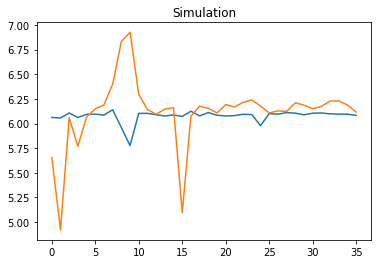

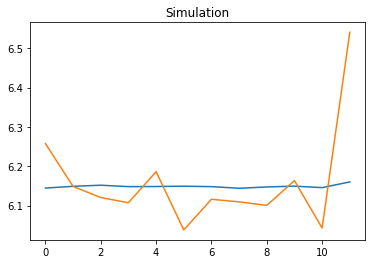

In [ ]:
hidden_dim = 20
if model_type == 1:
    intput_dim = 1
elif model_type == 2:
    input_dim = 6

Model = FFNN_Sev(input_dim, hidden_dim, norm=train_dataset.norm).to(device)

simulate(sim_loader, Model, block=True, denormalize=True,
            device=device)
simulate(valid_loader, Model, block=True, denormalize=True, device=device)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


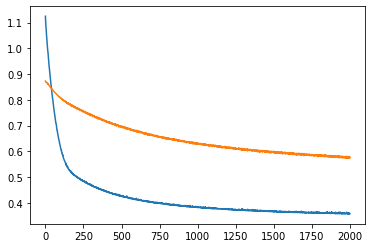

Best validation error:  1980


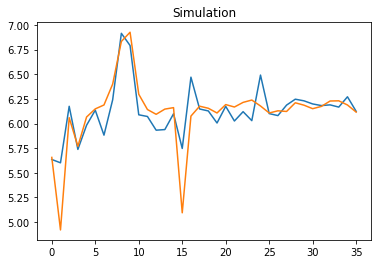

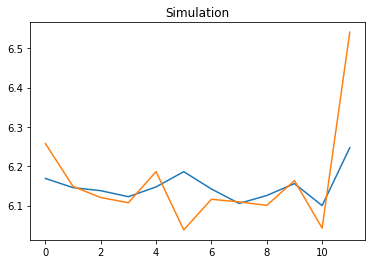

In [ ]:
Nb_Epochs = 2000
Learning_Rate = 1e-3

Train_info, _, _, date = Train(train_loader, valid_loader, Model, Nb_Epochs,
                                plot_bool=True, LR=Learning_Rate,
                                report=True, sim_loader=None,
                                print_bool=False, device=device,
                                remove_bool=True)

# Best model
simulate(sim_loader, Model, block=True, denormalize=True,
            device=device)
simulate(valid_loader, Model, block=True, denormalize=True, device=device)

In [ ]:
Load_Save(date, device=device, plot_bool=False, analysis=True, epoch=None,
          dataset_name='Severson', report_bool=False)

B0000.txt (used in training)
B0001.txt (used in training)
B0002.txt (used in training)
B0003.txt (used in training)
B0004.txt (used in training)
B0005.txt (used in training)
B0006.txt (used in training)
B0007.txt (used in training)
B0008.txt (used in training)
B0009.txt (used in training)
B0010.txt (used in training)
B0011.txt (used in training)
B0012.txt (used in training)
B0013.txt (used in training)
B0014.txt (used in training)
B0015.txt (used in training)
B0016.txt (used in training)
B0017.txt (used in training)
B0018.txt (used in training)
B0019.txt (used in training)
B0020.txt (used in training)
B0021.txt (used in training)
B0022.txt (used in training)
B0023.txt (used in training)
B0024.txt (used in training)
B0025.txt (used in training)
B0026.txt (used in training)
B0027.txt (used in training)
B0028.txt (used in training)
B0029.txt (used in training)
B0030.txt (used in training)
B0031.txt (used in training)
B0032.txt (used in training)
B0033.txt (used in training)
B0034.txt (use

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:97: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
# os.chdir('.//Reports/' + str(date))
# load_info = (Train_info.best_epoch.nb + 1, train_dataset.batteries,
#                 None, fixed_len, time_step, True, None,
#                 train_dataset.norm, None, Model.nb_clusters)

# with open('load_info.txt', 'wb') as f:
#     pickle.dump(load_info, f)
# os.chdir('../../')

In [ ]:
# for battery in Train_list:
#     if battery.cycle_couple[-1][1].data.capacity > 0.89:
#         print(battery.Name, battery.cycle_life, battery.cycle_couple[-1][0].number, battery.cycle_couple[-1][1].data.capacity)

# for battery in Valid_list:
#     if battery.cycle_couple[-1][1].data.capacity > 0.89:
#         print(battery.Name, battery.cycle_life, battery.cycle_couple[-1][0].number, battery.cycle_couple[-1][1].data.capacity)